In [7]:
pip install yfinance

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

sec.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-11-30,214.100006,214.759995,210.839996,214.070007,214.070007
2020-12-01,214.509995,217.320007,213.350006,216.210007,216.210007
2020-12-02,214.880005,215.470001,212.800003,215.369995,215.369995
2020-12-03,214.610001,216.380005,213.649994,214.240005,214.240005
2020-12-04,214.220001,215.380005,213.179993,214.360001,214.360001


In [12]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-11-30,214.100006,214.759995,210.839996,214.070007,214.070007
2020-12-01,214.509995,217.320007,213.350006,216.210007,216.210007
2020-12-02,214.880005,215.470001,212.800003,215.369995,215.369995
2020-12-03,214.610001,216.380005,213.649994,214.240005,214.240005
2020-12-04,214.220001,215.380005,213.179993,214.360001,214.360001


In [13]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-07'],
              dtype='datetime64[ns]', name='Date', length=636, freq=None)

In [14]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
pip install matplotlib

     |████████████████████████████████| 8.5 MB 7.1 MB/s eta 0:00:01
  Using cached Pillow-8.0.1-cp39-cp39-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 61 kB 214 kB/s eta 0:00:011
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


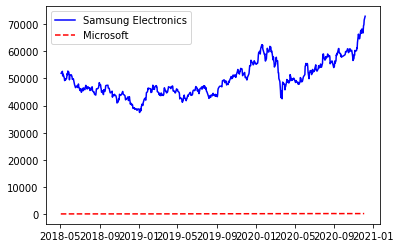

In [21]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [22]:
type(sec['Close'])

pandas.core.series.Series

In [23]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-12-01    67800.0
2020-12-02    69500.0
2020-12-03    69700.0
2020-12-04    71500.0
2020-12-07    72900.0
Name: Close, Length: 636, dtype: float64

In [24]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-12-01    66700.0
2020-12-02    67800.0
2020-12-03    69500.0
2020-12-04    69700.0
2020-12-07    71500.0
Name: Close, Length: 636, dtype: float64

In [29]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [30]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

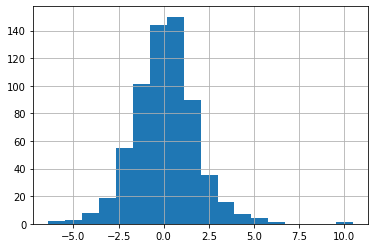

In [35]:
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins = 18, label='Samsung daily percent change')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


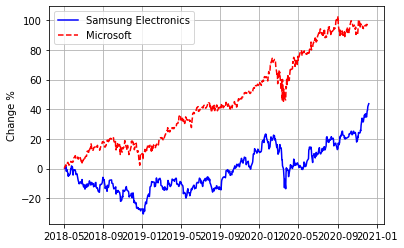

In [38]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] - msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


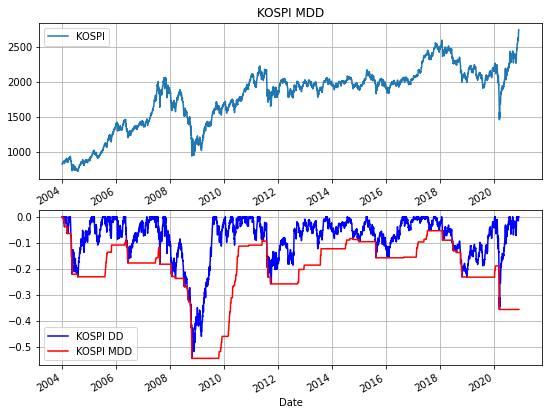

In [45]:
from  pandas_datareader import data as pdr
import yfinance as fy
fy.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo("^KS11", '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()